# Lab 3: ATLAS Data Analysis

### Part 1: The Invariant Mass Distribution

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Part 1a
# read CSV
data = pd.read_csv('atlas_z_to_ll.csv')

In [2]:
# Part 1b
# access each column by name
pt1 = data['pt1'] #units  are GeV
pt2 = data['pt2']
eta1 = data['eta1']
eta2 = data['eta2']
phi1 = data['phi1']
phi2 = data['phi2']
E1 = data['E1'] #units are GeV
E2 = data['E2']

#calculate compenents of each momentum
px1 = pt1 * np.cos(phi1)
px2 = pt2 * np.cos(phi2)
py1 = pt1 * np.sin(phi1)
py2 = pt2 * np.sin(phi2)
pz1 = pt1 * np.sinh(eta1)
pz2 = pt2 * np.sinh(eta2)

#find total momentum in each component direction
px = px1 + px2
py = py1 + py2
pz = pz1 +pz2

#find total energy
E = E1 + E2

M = np.sqrt((E)**2 - ((px)**2 + (py)**2 + (pz)**2))

print(f"The mass of each lepton pair are {M}")

The mass of each lepton pair are 0       92.150037
1       89.282450
2       88.274725
3       46.788243
4       91.529042
          ...    
4995    61.176716
4996    23.468150
4997    89.496742
4998    67.409373
4999    90.847967
Length: 5000, dtype: float64


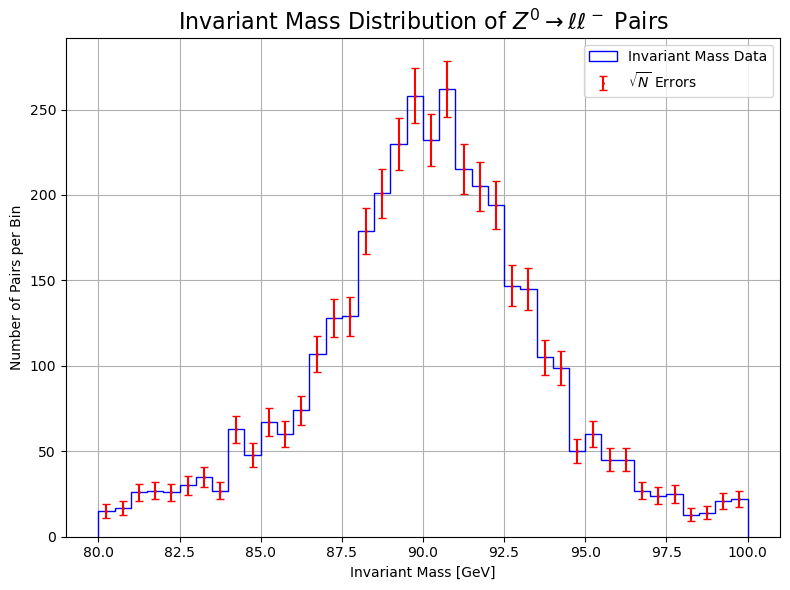

In [3]:
#part 1c
figure, ax = plt.subplots(1,1, figsize= (8,6))
bins = np.linspace(80,100,41)
counts , bins = np.histogram(M, bins=bins)
sigma = np.sqrt(counts)
bin_centers = 0.5 * (bins[:-1] + bins[1:])
ax.hist(M, bins=bins, histtype = 'step', color = 'blue', label='Invariant Mass Data')
ax.errorbar(bin_centers, counts, yerr=sigma, fmt='o', capsize=3, markersize=1, color = 'red', label=r'$\sqrt{N}$ Errors')

# labels and title
ax.set_xlabel('Invariant Mass [GeV]')
ax.set_ylabel('Number of Pairs per Bin')
ax.set_title(r'Invariant Mass Distribution of $Z^0 \rightarrow \ell \ell^-$ Pairs', fontsize = 16)
ax.legend()
ax.grid(True)
plt.tight_layout()

### Part 2: Breit-Wigner Fit

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import chi2 as chi2_dist

#part 2a
def D(m, m0, gamma):
    result = (1/np.pi) * ((gamma/2)/((m-m0)**2 + (gamma/2)**2))
    return result

In [5]:
#part 2b
#create mask for desired data
mask = (bin_centers > 87) & (bin_centers < 93)
m_fit = bin_centers[mask]
sigma_fit = sigma[mask]
counts_fit = counts[mask]

#redefine function multiplied to be fit function
def func_fit(m, m0, gamma):
    result = (5000/2) * (D(m, m0, gamma))
    return result

#do fit and take results
popt, pcov = curve_fit(func_fit, m_fit, counts_fit, sigma=sigma_fit)
m0_fit, gamma_fit = popt
unc_m0_fit, unc_gamma_fit = np.sqrt(np.diag(pcov))

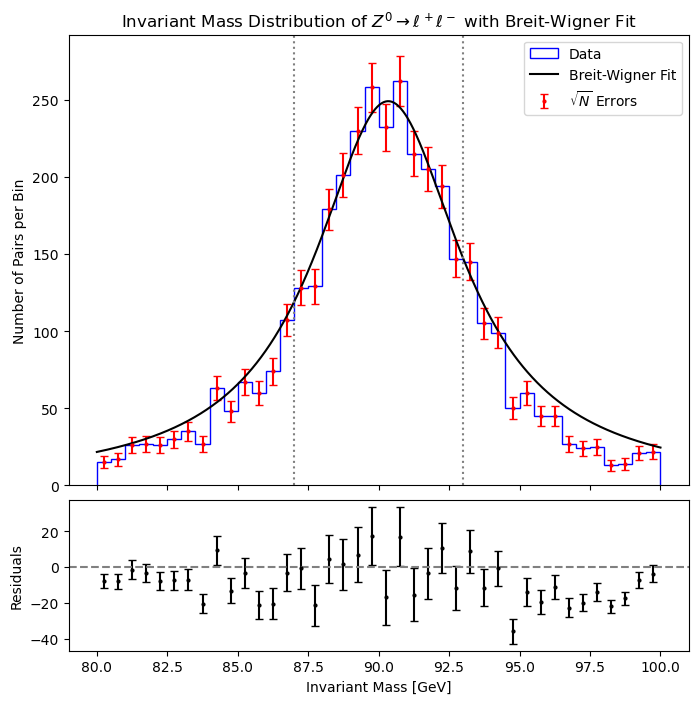

In [6]:
#part 2c
figure, (ax_top, ax_bot) = plt.subplots(2, 1, figsize=(8,8), sharex=True,
                                     gridspec_kw={'height_ratios': [3,1], 'hspace':0.05})

# make top panel: data + fit
ax_top.hist(M, bins=bins, histtype='step', color='blue', label='Data')
ax_top.errorbar(bin_centers, counts, yerr=sigma, fmt='o', capsize=3, markersize=2, color='red', label=r'$\sqrt{N}$ Errors')

m_plot = np.linspace(80, 100, 1000) # fit runs full data
ax_top.plot(m_plot, func_fit(m_plot, *popt), color='black', label='Breit-Wigner Fit')

#vertical lines between mask ranged
ax_top.axvline(87, color='gray', linestyle='dotted')
ax_top.axvline(93, color='gray', linestyle='dotted')

#labels
ax_top.set_ylabel('Number of Pairs per Bin')
ax_top.set_title(r'Invariant Mass Distribution of $Z^0 \rightarrow \ell^+\ell^-$ with Breit-Wigner Fit')
ax_top.legend()

# make bottom panel: residuals
residuals = counts - func_fit(bin_centers, *popt)
ax_bot.errorbar(bin_centers, residuals, yerr=sigma, fmt='o', capsize=3, markersize=2, color='black')
ax_bot.axhline(0, color='gray', linestyle='dashed')

#set labels
ax_bot.set_xlabel('Invariant Mass [GeV]')
ax_bot.set_ylabel('Residuals');

In [7]:
#part 2d
# find the chi-square
chisq = np.sum(((counts_fit - func_fit(m_fit, *popt)) / sigma_fit) ** 2)

# find the number of degrees of freedom
ndof = len(m_fit) - 2  # the two fitting parameters are m0 and gamma

# find the reduced chi-square
chisq_red = chisq / ndof

# find the p-value
p_value = 1 - chi2_dist.cdf(chisq, ndof)

# print results
print(f"Chi Squared = {chisq:.1f}")
print(f"Number of Degrees of Freedom = {ndof}")
print(f"Reduced Chi Squared = {chisq_red:.2f}")
print(f"p-value = {p_value:.3f}")

Chi Squared = 10.0
Number of Degrees of Freedom = 10
Reduced Chi Squared = 1.00
p-value = 0.442


In [8]:
#part 2e
# print results
print(f"Best fit m0 = {m0_fit:.2f} ± {unc_m0_fit:.2f} GeV")
print(f"Best fit Gamma = {gamma_fit:.2f} ± {unc_gamma_fit:.2f} GeV")

Best fit m0 = 90.34 ± 0.09 GeV
Best fit Gamma = 6.39 ± 0.18 GeV


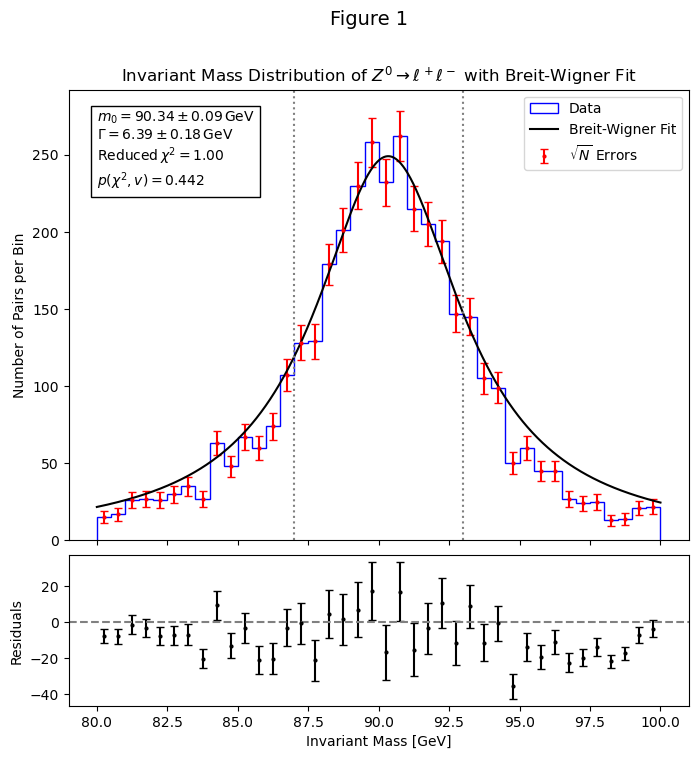

In [9]:
#part 2f
# format text for annotation
fit_text = (
    rf"$m_0 = {m0_fit:.2f} \pm {unc_m0_fit:.2f}\, \mathrm{{GeV}} $" + "\n" +
    rf"$Γ = {gamma_fit:.2f} \pm {unc_gamma_fit:.2f}\,\mathrm{{GeV}}$" + "\n" +
    rf"$\mathrm{{Reduced}}\, \chi^2 = {chisq_red:.2f}$" + "\n" +
    rf"$p(\chi^2, v) = {p_value:.3f}$")

#reuse graph from part c
fig, (ax_top, ax_bot) = plt.subplots(2, 1, figsize=(8,8), sharex=True,
                                     gridspec_kw={'height_ratios': [3,1], 'hspace':0.05})

# make top panel: data + fit
ax_top.hist(M, bins=bins, histtype='step', color='blue', label='Data')
ax_top.errorbar(bin_centers, counts, yerr=sigma, fmt='o', capsize=3, markersize=2, color='red', label=r'$\sqrt{N}$ Errors')

m_plot = np.linspace(80, 100, 1000) # fit runs full data
ax_top.plot(m_plot, func_fit(m_plot, *popt), color='black', label='Breit-Wigner Fit')

#vertical lines between mask ranged
ax_top.axvline(87, color='gray', linestyle='dotted')
ax_top.axvline(93, color='gray', linestyle='dotted')

#labels
ax_top.set_ylabel('Number of Pairs per Bin')
ax_top.set_title(r'Invariant Mass Distribution of $Z^0 \rightarrow \ell^+\ell^-$ with Breit-Wigner Fit')
ax_top.legend()

# make bottom panel: residuals
residuals = counts - func_fit(bin_centers, *popt)
ax_bot.errorbar(bin_centers, residuals, yerr=sigma, fmt='o', capsize=3, markersize=2, color='black')
ax_bot.axhline(0, color='gray', linestyle='dashed')

#set labels
ax_bot.set_xlabel('Invariant Mass [GeV]')
ax_bot.set_ylabel('Residuals')
# position annotation (adjust x and y for aesthetics)
ax_top.text(80, 230, fit_text, fontsize=10, bbox=dict(facecolor='white', edgecolor='black'))


fig.suptitle("Figure 1", fontsize = 14);

### Part 3: 2D Parameter Contours

In [10]:
import numpy as np
import matplotlib.pyplot as plt

#part 3a
m0_vals = np.linspace(89 ,91, 300)
gamma_vals = np.linspace(5, 8, 300)
m0_grid, gamma_grid = np.meshgrid(m0_vals, gamma_vals)

chi2_grid = np.zeros_like(m0_grid)
for i in range(len(gamma_vals)):
    for j in range(len(m0_vals)):
        model_vals = func_fit(m_fit, m0_vals[j], gamma_vals[i])
        chi2_grid[i, j] = np.sum(((counts_fit - model_vals) / sigma_fit) ** 2)
        
print(chi2_grid)

[[434.17791012 431.01532763 427.86110917 ... 175.07088177 176.63332732
  178.2074001 ]
 [431.37920195 428.23067306 425.09046563 ... 173.25395501 174.80935156
  176.37633441]
 [428.60332264 425.46876454 422.34248574 ... 171.45586073 173.0042526
  174.56419009]
 ...
 [183.01218102 181.91119692 180.81397175 ...  93.56293677  94.14447451
   94.73129182]
 [183.2387054  182.14076903 181.0465859  ...  94.0869225   94.66713023
   95.25260627]
 [183.46876291 182.37386125 181.28270719 ...  94.61329421  95.19217797
   95.77631881]]


[[424.19133674 421.02875426 417.8745358  ... 165.0843084  166.64675395
  168.22082673]
 [421.39262858 418.24409969 415.10389226 ... 163.26738164 164.82277819
  166.38976104]
 [418.61674927 415.48219117 412.35591237 ... 161.46928736 163.01767923
  164.57761672]
 ...
 [173.02560765 171.92462355 170.82739838 ...  83.5763634   84.15790114
   84.74471845]
 [173.25213203 172.15419565 171.06001253 ...  84.10034913  84.68055686
   85.2660329 ]
 [173.48218954 172.38728788 171.29613382 ...  84.62672084  85.2056046
   85.78974544]]


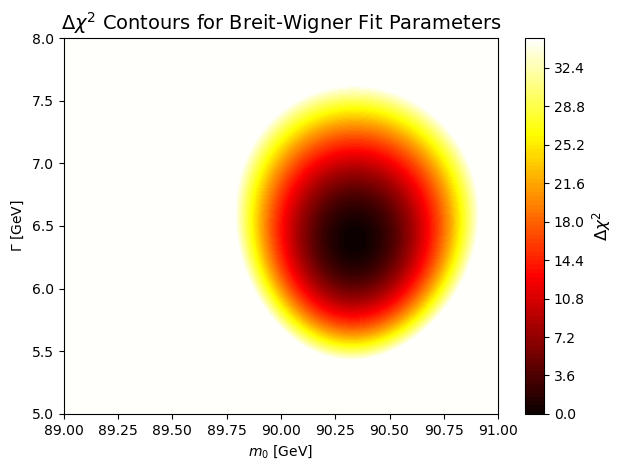

In [11]:
#part 3b
X, Y = m0_grid, gamma_grid
delta_chisq = chi2_grid - np.min(chi2_grid)
print(delta_chisq)

delta_chisq_clip = np.clip(delta_chisq, 0, 35)

figure, ax = plt.subplots(1,1)
cmap = ax.contourf(X, Y, delta_chisq_clip, levels=100, cmap='hot')
cbar = plt.colorbar(cmap, ax=ax)
cbar.set_label(r'$\Delta \chi^2$')

ax.set_xlabel(r'$m_0$ [GeV]')
ax.set_ylabel(r'$\Gamma$ [GeV]')
ax.set_title(r'$\Delta \chi^2$ Contours for Breit-Wigner Fit Parameters', fontsize=14)
cbar.set_label(r'$\Delta \chi^2$', fontsize=12)
plt.tight_layout()

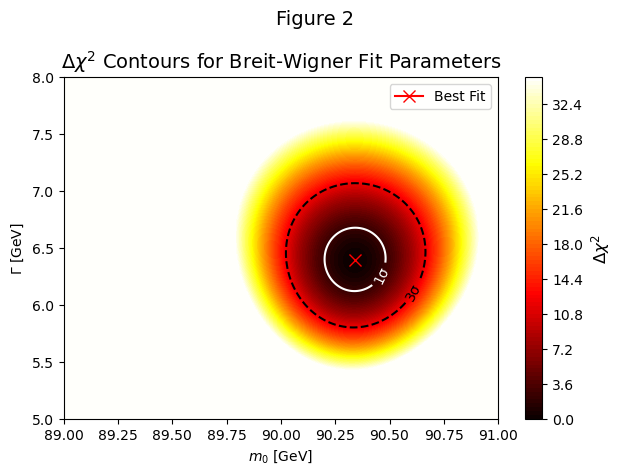

In [12]:
#part 3c
#reuse previous graph
figure, ax = plt.subplots(1,1)
cmap = ax.contourf(X, Y, delta_chisq_clip, levels=100, cmap='hot')
cbar = plt.colorbar(cmap, ax=ax)
cbar.set_label(r'$\Delta \chi^2$')

# put in confidence contours (1σ = 2.30, 3σ = 11.83)
contour_levels = [2.30, 11.83]
contours = ax.contour(m0_grid, gamma_grid, delta_chisq, levels=contour_levels,
                      colors=['white', 'black'], linestyles=['solid', 'dashed'])
ax.clabel(contours, inline=True, fmt={2.30: '1σ', 11.83: '3σ'}, fontsize=10)







# Part 3d: mark best fit point (if I made a new cell for this step it would look the exact same)
ax.plot(m0_fit, gamma_fit, marker='x', color='red', markersize=8, label='Best Fit')
ax.legend()

#label and title
ax.set_xlabel(r'$m_0$ [GeV]')
ax.set_ylabel(r'$\Gamma$ [GeV]')
ax.set_title(r'$\Delta \chi^2$ Contours for Breit-Wigner Fit Parameters', fontsize=14)
cbar.set_label(r'$\Delta \chi^2$', fontsize=12)
figure.suptitle("Figure 2", fontsize=14)
plt.tight_layout()